In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import numpy as np
from __future__ import division


In [2]:
user_tab=pd.read_csv('user_table.csv')

In [3]:
def missingdate(data):
    if data is None or data is np.nan :
         return 0
    else:
        return data

In [4]:
events=pd.read_csv('test_table.csv')

In [5]:
mode_of_channel= events['ads_channel'].mode()

In [6]:
events['ads_channel']=events['ads_channel'].map(lambda x : missingdate(x))

In [7]:
events_union= pd.merge(events,user_tab,on='user_id')

In [8]:
from scipy.stats import chi2_contingency


## Question 1 

Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better 

## Consider Spain and LatAM

In [9]:
def conversion(data):
    x = data['Converted']
    y = data['Not-Converted']
    value = (x/(x+y)*100)  
    return "{0:.2f}%".format(value)
    

In [10]:
results = pd.crosstab(events_union['test'],events_union['conversion'])

In [11]:
results.columns=['Not-Converted','Converted']
results.index=['Control','Test']
results['Conversion']=results[['Converted','Not-Converted']].apply(conversion,axis=1)

In [12]:
results

,Not-Converted,Converted,Conversion
Control,224016,13077,5.52%
Test,206407,9367,4.34%


In [13]:
result = chi2_contingency(results.values[:,:2])

In [14]:
chisq, p = result[:2]
print 'chisq = {}, p = {}'.format(chisq, p)

print '\n'

if p>0.05:
    print 'Cannot reject Null hypothesis'
else:
    print 'Can reject Null hypothesis'

chisq = 330.54287843, p = 7.32062231754e-74


Can reject Null hypothesis


## Lift 

In [15]:
def lift(control,test):
    x = float(control.replace('%',''))
    y=float(test.replace('%',''))
    value = ((x-y)/y)*100
    
    return "{0:.2f}%".format(value) 


In [16]:
lift = lift(results['Conversion']['Control'],results['Conversion']['Test'])
print lift

27.19%


## Consider only LatAM

In [17]:
data=events_union[events_union['country']!='Spain']

In [18]:
results1 = pd.crosstab(data['test'],data['conversion'])

In [19]:
results1 =pd.crosstab(data['test'],data['conversion'])
results1

conversion,0,1
test,,
0,176362,8949
1,206407,9367


In [20]:
results1.columns=['Not-Converted','Converted']
results1.index=['Control','Test']
results1['Conversion']=results1[['Converted','Not-Converted']].apply(conversion,axis=1)

In [21]:
results1

,Not-Converted,Converted,Conversion
Control,176362,8949,4.83%
Test,206407,9367,4.34%


In [22]:
from __future__ import division

In [23]:
result_1 = chi2_contingency(results1.values[:,:2])

In [24]:
chisq_1, p_1 = result[:2]
print 'chisq = {}, p = {}'.format(chisq_1, p_1)

print '\n'

if p_1>0.05:
    print 'Cannot reject Null hypothesis'
else:
    print 'Can reject Null hypothesis'

chisq = 330.54287843, p = 7.32062231754e-74


Can reject Null hypothesis


In [25]:
def lift(control,test):
    x = float(control.replace('%',''))
    y=float(test.replace('%',''))
    value = ((x-y)/y)*100
    
    return "{0:.2f}%".format(value) 

## Lift

In [26]:
lift_1 = lift(results1['Conversion']['Control'],results1['Conversion']['Test'])
print lift_1

11.29%


## Question 3 


In [27]:
def browser_language(data):
    if data=='ES':
        return 1
    elif data=='EN':
        return 2
    else:
        return 0

In [28]:
def check(data):
    test = data['test']
    conversion= data['conversion']
    if test == conversion:
        return 0 
    else:
        return 1

In [29]:
def device_check(data):
    if data=='Web':
        return 1
    elif data=='Mobile':
        return 2
    else:
        return None


In [30]:
def source_check(data):
    if data=='Direct':
        return 1
    elif data=='Ads':
        return 2
    elif data=='SEO':
        return 3
    else:
        return None

In [31]:
def ad_check(data):
    if data=='Google':
        return 1
    elif data=='Bing':
        return 2
    elif data=='Yahoo':
        return 3
    elif data=='Facebook':
        return 4
    elif data=='Other':
        return 5
    else:
        return data

In [32]:
def browser_check(data):
    if data=='IE':
        return 1
    elif data=='Chrome':
        return 2
    elif data=='FireFox':
        return 3
    elif data=='Android_App':
        return 4
    elif data=='Iphone_App':
        return 5
    elif data=='Safari':
        return 6
    
    
    elif data=='Opera':
        return 7
    else:
        return None

In [33]:
def gender(data):
    if data=='M':
        return 1
    elif data=='F':
        return 2 

In [34]:
def weekDay(date):
    date=datetime.strptime(date,"%Y-%m-%d")
    year=date.year
    month=date.month
    day= date.day
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux / 4 - aux / 100 + (aux + 100) / 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return dayOfWeek

In [35]:
def weekend(data):
    if data==0 or data==6:
        return 1
    else: 
        return 0

In [36]:
events_union['Check']=events_union[['test','conversion']].apply(check,axis=1)

In [37]:
events_union['browserlanguage']=events_union['browser_language'].map(lambda x : browser_language(x))

In [38]:
events_union['Device']=events_union['device'].map(lambda x: device_check(x))
events_union['Source']=events_union['source'].map(lambda x: source_check(x))
events_union['Ads_channel']=events_union['ads_channel'].map(lambda x: ad_check(x))
events_union['Browser']=events_union['browser'].map(lambda x: browser_check(x))
events_union['Gender']=events_union['sex'].map(lambda x: gender(x))
# events_union['Day']=events_union['date'].map(lambda x : weekDay(x))
# events_union['Weekend']=events_union['Day'].map(lambda x: weekend(x))

In [39]:
events_union=events_union.drop(['source','device','ads_channel','browser','sex','date','test','conversion'],axis=1)

In [40]:
col= events_union.columns

In [41]:
for col in col :
    if col == 'user_id 'or col == 'age':
        continue
    else:
        events_union[col]=events_union[col].astype('category')
        events_union[col]=events_union[col].cat.codes

In [42]:
from sklearn import cross_validation

In [43]:
train, test=cross_validation.train_test_split(events_union, train_size = 0.7)

In [45]:
Xtrain = train.drop(['user_id','Check','browserlanguage'],axis=1)
Ytrain = train['Check']

Xtest = test.drop(['user_id','Check','browserlanguage'],axis=1)
Ytest = test['Check']


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()

In [48]:
rf.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

                  importance
feature                     
country                0.542
age                    0.351
Browser                0.034
Ads_channel            0.033
browser_language       0.021
Gender                 0.012
Source                 0.006
Device                 0.002


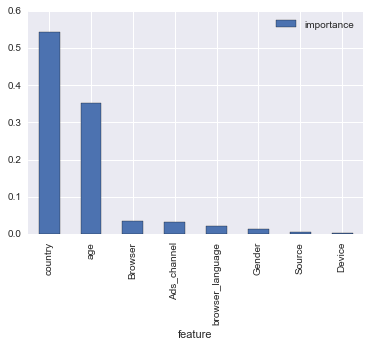

In [50]:
importances = pd.DataFrame({'feature':Xtrain.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()

In [49]:
pd.crosstab(rf.predict(Xtrain),Ytrain)

Check,0,1
row_0,,
0,111617,48277
1,51809,105303


In [51]:
(111617+105303)/len(train)

0.684277269199952

In [52]:
pd.crosstab(rf.predict(Xtest),Ytest)

Check,0,1
row_0,,
0,40835,28110
1,29122,37794


In [56]:
((40669+38110)/len(test))

0.5798499937436056